In [30]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# Reading the dataset
house_data = pd.read_csv('raw_house_data.csv')

In [32]:
# Printing the first 4 rows
house_data.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55


In [33]:
# Printing the info of the dataset
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         4994 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4993 non-null   float64
 12  kitchen_features  4967 non-null   object 
 13  fireplaces        4975 non-null   float64
 14  floor_covering    4999 non-null   object 
 15  HOA               4438 non-null   object 
dtypes: float64(9), int64(4), object(3)
memory 

In [34]:
house_data.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000,4994.000000,4944.000000,4993.000000,4975.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800,3.829896,3716.366828,2.816143,1.885226
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362,1.387063,1120.683515,1.192946,1.136578
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000,1.000000,1100.000000,0.000000,0.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000,3.000000,3047.000000,2.000000,1.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000,4.000000,3512.000000,3.000000,2.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000,4.000000,4130.250000,3.000000,3.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000,36.000000,22408.000000,30.000000,9.000000


In [35]:
# Converting the HOA column to float
house_data['HOA'] = house_data['HOA'].str.replace(',', '').astype(float)

In [36]:
# Converting the zipcode column to object
house_data['zipcode'] = house_data['zipcode'].astype('object')

In [37]:
# Checking missing values
house_data.isnull().sum()

,0
MLS,0
sold_price,0
zipcode,0
longitude,0
latitude,0
lot_acres,10
taxes,0
year_built,0
bedrooms,0
bathrooms,6


In [38]:
# Dropping missing values
house_data = house_data.dropna()

In [39]:
# Checking for duplicates
house_data.duplicated().sum()

0

In [40]:
columns= house_data.columns
numeric_columns = house_data.select_dtypes(include=['number'])
numeric_columns.drop(['MLS', 'longitude', 'latitude', 'year_built'], axis= 1, inplace= True)
numeric_columns = numeric_columns.columns

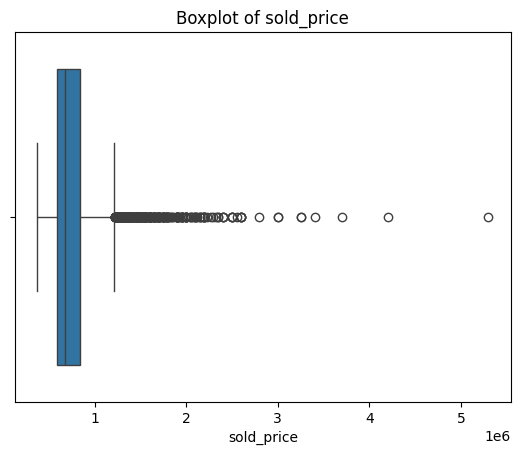

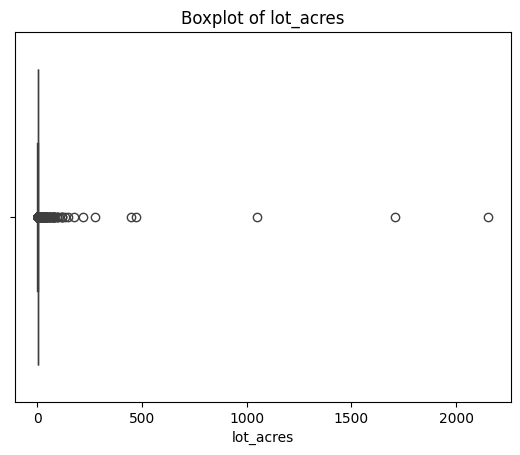

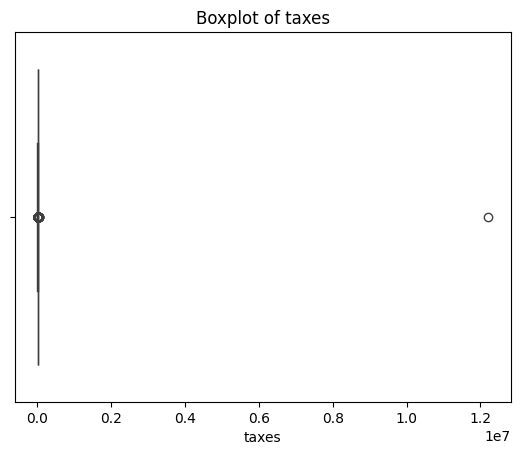

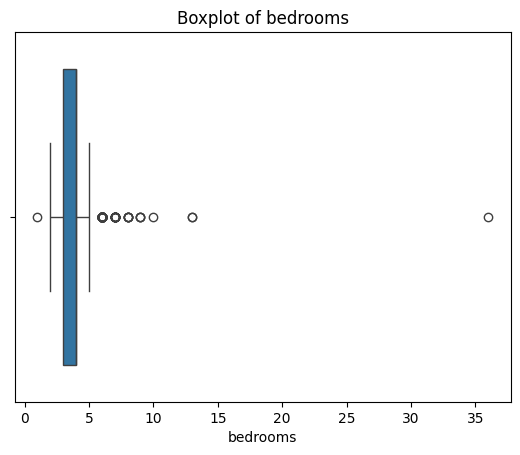

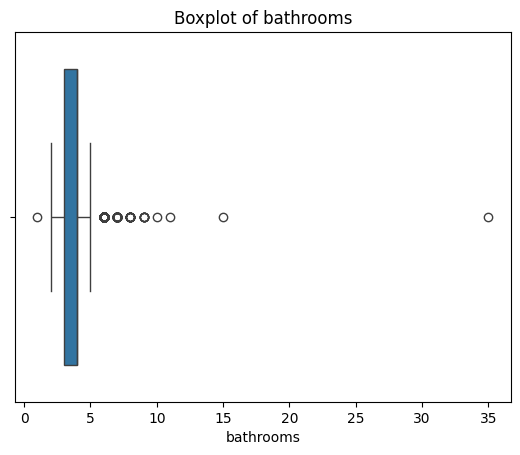

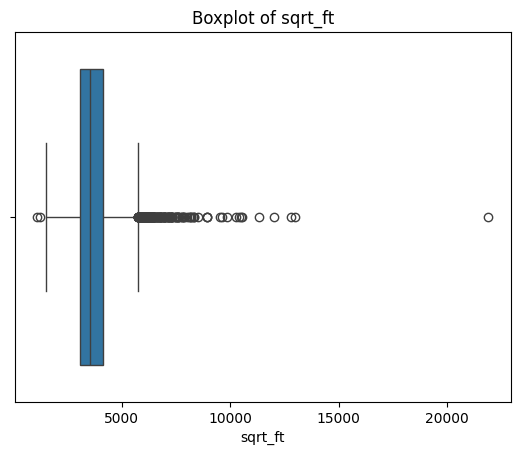

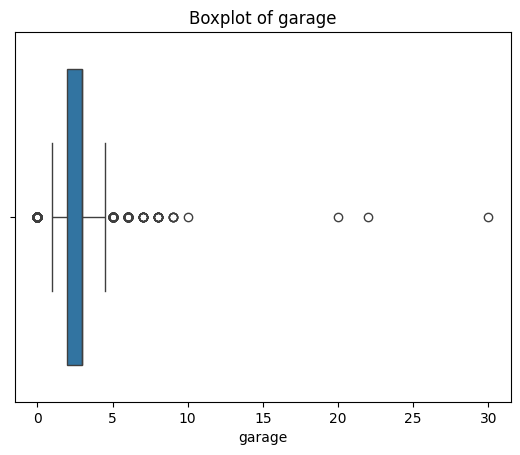

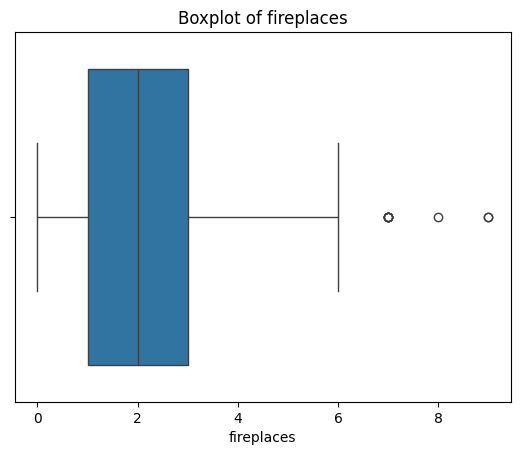

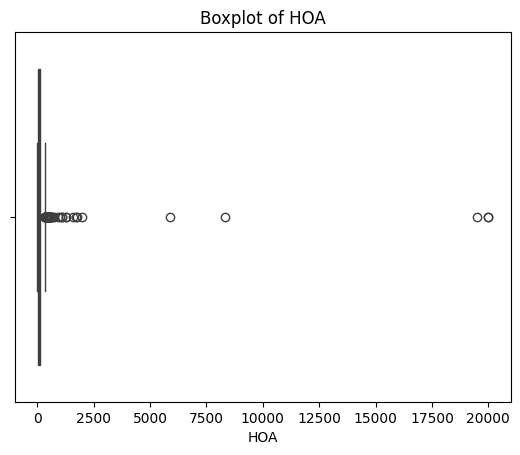

In [41]:
# Plotting box plot for numeric columns
for column in numeric_columns:
  sns.boxplot(x=house_data[column])
  plt.title(f'Boxplot of {column}')
  plt.show()

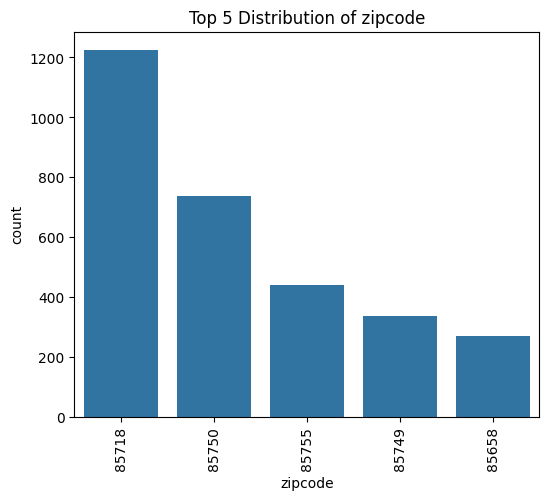

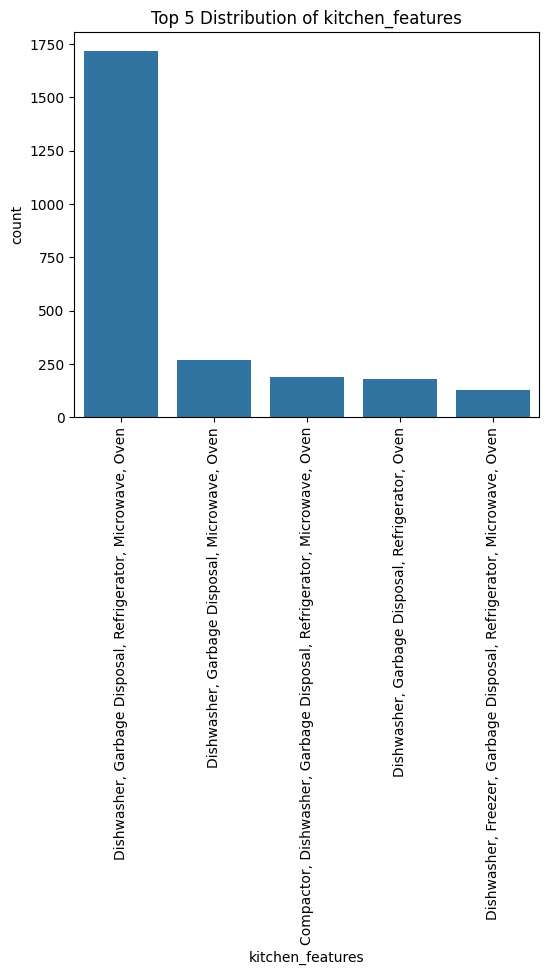

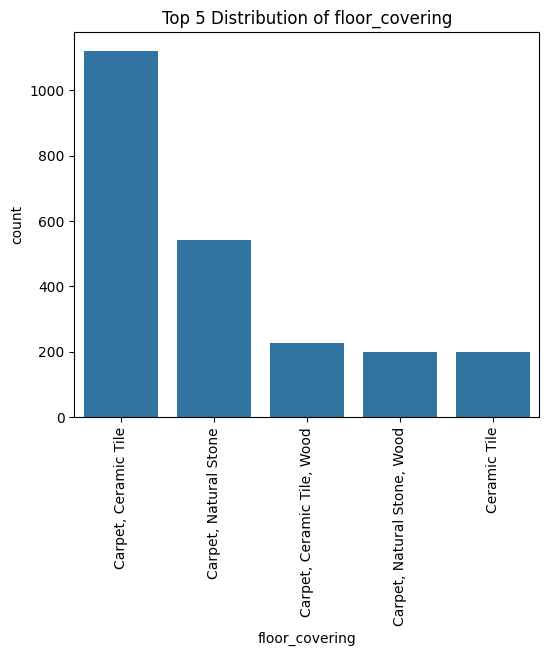

In [42]:
# Plotting Bar Plots for categorical variables
categorical_columns = house_data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(6, 5))

    top5 = house_data[column].value_counts().nlargest(5).index
    top5_data = house_data[house_data[column].isin(top5)]
    sns.countplot(x=top5_data[column], order=top5)
    plt.title(f'Top 5 Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

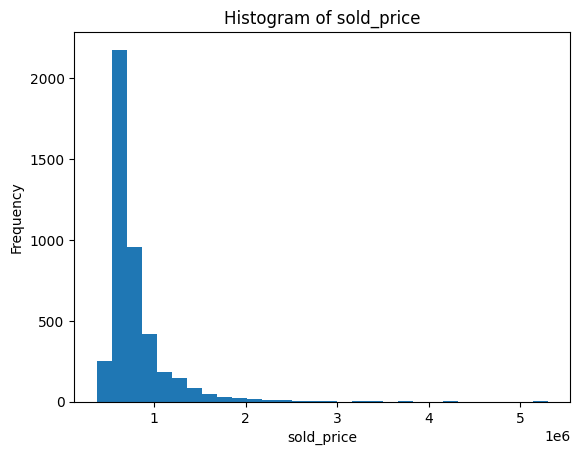

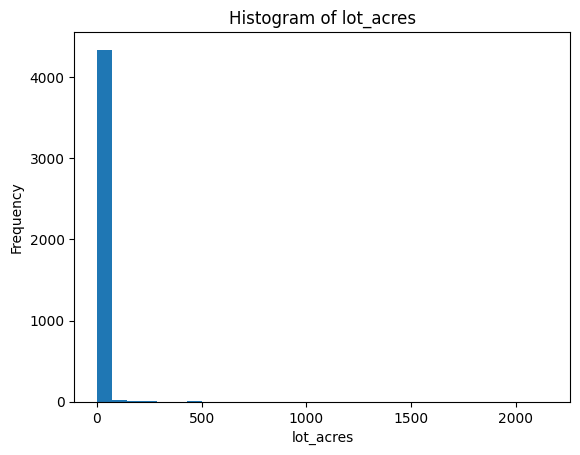

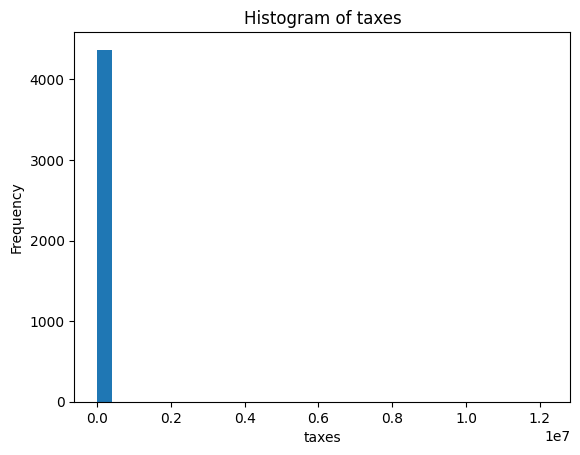

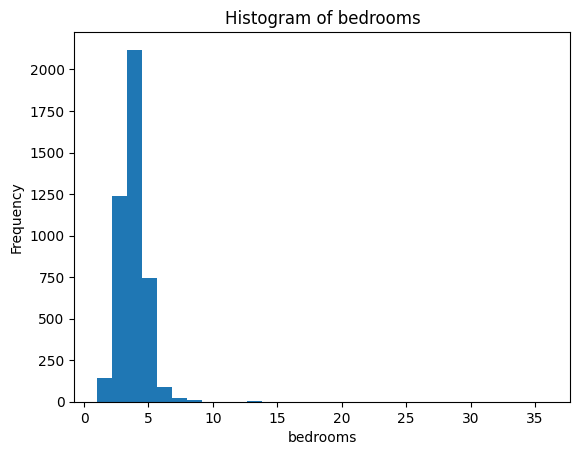

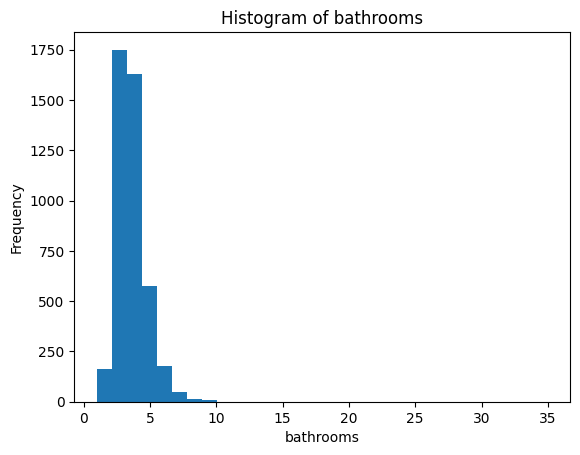

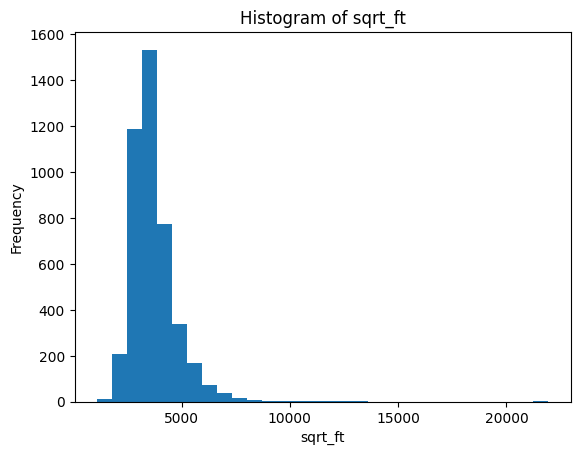

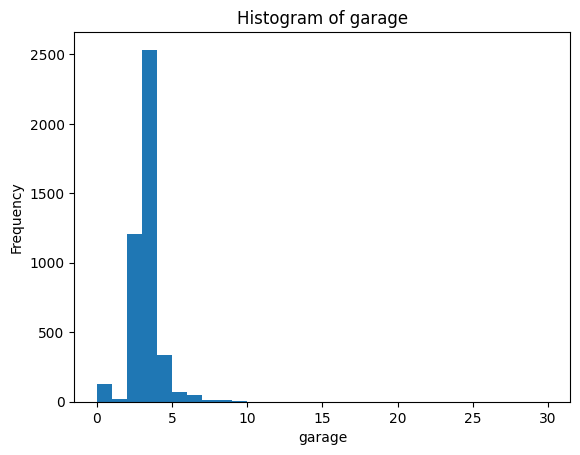

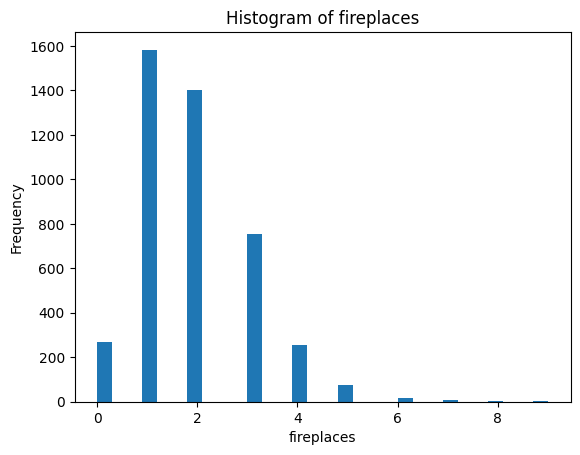

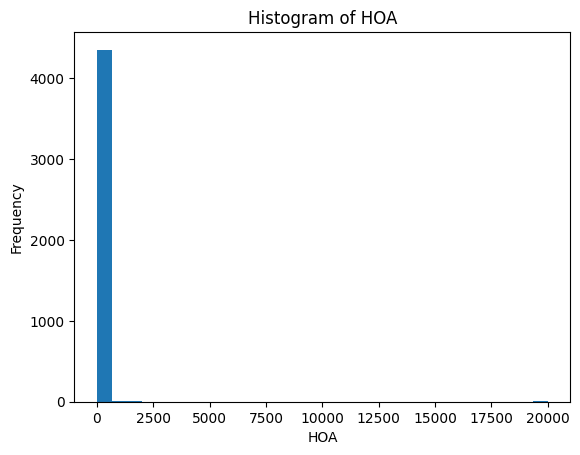

In [43]:
# Plotting Histogram for numeric columns
for column in numeric_columns:
  if house_data[column].dtype in ['float64', 'int64']:
    plt.hist(house_data[column], bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
  else:
    print(f"Skipping non-numeric column: {column}")

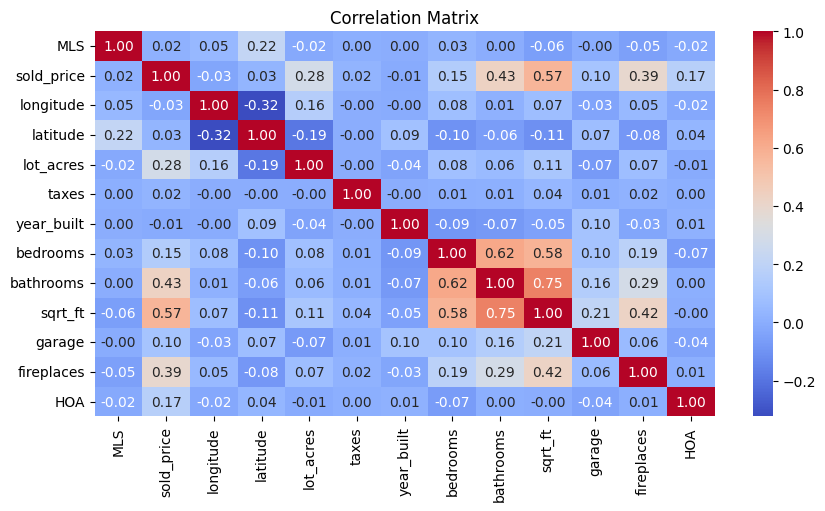

In [44]:
# Correlation matrix
plt.figure(figsize=(10,5))
corr_matrix = house_data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [45]:
# Handling Outliers
house_data['log_sold_price'] = np.log(house_data['sold_price'])
house_data['log_lot_acres'] = np.log1p(house_data['lot_acres'])
house_data['log_taxes'] = np.log1p(house_data['taxes'])
house_data['log_bedrooms'] = np.log1p(house_data['bedrooms'])
house_data['log_bathrooms'] = np.log1p(house_data['bathrooms'])
house_data['log_sqrt_ft'] = np.log1p(house_data['sqrt_ft'])
house_data['log_garage'] = np.log1p(house_data['garage'])
house_data['log_fireplaces'] = np.log1p(house_data['fireplaces'])
house_data['log_HOA'] = np.log1p(house_data['HOA'])

In [47]:
# Handling Categorical Columns
categorical_columns = house_data.select_dtypes(include=['object']).columns
# Convert all categorical columns to lowercase (or uppercase)
for col in categorical_columns:
    if house_data[col].apply(lambda x: isinstance(x, str)).all():
        house_data[col] = house_data[col].str.lower()
# Perform one-hot encoding
house_data = pd.get_dummies(house_data, columns=categorical_columns, drop_first=True)
# Convert boolean values to 1s and 0s
house_data = house_data.astype(int)
house_data

,MLS,sold_price,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,...,floor_covering_other: porcelyn,floor_covering_other: quartzite,floor_covering_other: recycled porcelain,floor_covering_other: tbd,floor_covering_other: tile,floor_covering_other: travertine,floor_covering_wood,"floor_covering_wood, other","floor_covering_wood, other: lime stone","floor_covering_wood, other: porcelain tile"
0,21530491,5300000,-110,31,2154,5272,1941,13,10,10500,...,0,0,0,0,0,0,0,0,0,0
1,21529082,4200000,-111,31,1707,10422,1997,2,2,7300,...,0,0,0,0,0,0,0,0,0,0
4,21306357,3411450,-110,32,3,15393,1995,4,6,6396,...,0,0,0,0,0,0,0,0,0,0
5,21528016,3250000,-110,32,1,27802,1999,3,4,6842,...,0,0,0,0,0,0,0,0,0,0
6,21610478,2400000,-110,32,2,19038,2001,9,8,12025,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,21814465,534000,-110,32,0,4184,2006,2,3,2681,...,0,0,0,0,0,0,0,0,0,0
4989,21902512,545000,-111,32,1,6326,2007,4,3,3720,...,0,0,0,0,0,0,0,0,0,0
4993,21908358,565000,-110,32,0,4568,1986,4,3,2813,...,0,0,0,0,0,0,0,0,0,0
4994,21909379,535000,-110,32,0,4414,2002,3,2,2106,...,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns that need to be standardized
columns_to_standardize = ['sold_price', 'lot_acres', 'taxes', 'sqrt_ft', 'bedrooms', 'bathrooms', 'garage', 'fireplaces',
                          'log_sold_price', 'log_lot_acres', 'log_taxes', 'log_bedrooms', 'log_bathrooms', 'log_sqrt_ft', 'log_garage', 'log_fireplaces', 'log_HOA']

scaler = StandardScaler()
house_data[columns_to_standardize] = scaler.fit_transform(house_data[columns_to_standardize])


In [49]:
# Assuming your cleaned DataFrame is named 'house_data'
file_path = 'cleaned_house_data.csv'

# Save the DataFrame to a CSV file
house_data.to_csv(file_path, index=False)